In [1]:
import pandas as pd
import numpy as np
import acessos as ac
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
query = '''

select ds_perfil_conexao
, count(distinct cpf) as clientes
, sum(nr_acessos) as nr_acessos
, sum(avg_vl_total_spending) as avg_vl_total_spending
, sum(nr_purchases_online) as nr_purchases_online
, sum(nr_purchases_virtual) as nr_purchases_virtual
, sum(nr_pagamentos_conta) as nr_pagamentos_conta
, sum(nr_trans_pix) as nr_trans_pix
, sum(nr_antecipacao_fatura) as nr_antecipacao_fatura
, sum(nr_purchases_contactless) as nr_purchases_contactless
, sum(nr_pagamentos_conta) as nr_pagamentos_conta
, sum(nr_trans_pix) as nr_trans_pix
, sum(nr_antecipacao_fatura) as nr_antecipacao_fatura
, sum(nr_purchases_contactless) as nr_purchases_contactless
, avg(case when  nr_purchases_online > 0 then 1 else 0 end) as perc_online
, avg(case when  trans_recorrente > 0 then 1 else 0 end) as perc_recorrente
, avg(case when  trans_mobilidade_app > 0 then 1 else 0 end) as perc_mobilidade
, avg(case when  trans_delivery > 0 then 1 else 0 end) as perc_delivery
, avg(case when trans_recarga_geral > 0 then 1 else 0 end) as perc_recarga_geral
, avg(case when trans_streaming > 0 then 1 else 0 end) as perc_streaming
, avg(case when trans_rede_social > 0 then 1 else 0 end) as perc_rede_social
, avg(case when trans_games > 0 then 1 else 0 end) as perc_games
, avg(case when trans_cripto > 0 then 1 else 0 end) as perc_cripto
, avg(case when  gender = 'FEMALE' then 1 else 0 end) as perc_mulher
, avg(case when nm_current_os = 'ios' then 1 else 0 end) as perc_ios
, avg(case when ds_city_size = 'pequeno' then 1 else 0 end) as perc_cid_pequena
, avg(case when flag_bolso = 1 then 1 else 0 end) as perc_bolso
, avg(case when  nr_pagamentos_conta > 0 then 1 else 0 end) as perc_pagamentos_conta
, avg(case when  nr_purchases_contactless > 0 then 1 else 0 end) as perc_contactless
, avg(case when  nr_trans_pix > 0 then 1 else 0 end) as perc_trans_pix
, avg(case when  nr_antecipacao_fatura > 0 then 1 else 0 end) as perc_antecipacao_fatura
, avg(case when  nr_purchases_virtual > 0 then 1 else 0 end) as perc_purchases_virtual
, avg(case when  ds_risk_type = '2. Alto Risco' then 1 else 0 end) as perc_alto_risco
, avg(flag_autonomo) as perc_autonomo
from customer_sandbox_zone.segmentacao_digital_credito_flavia_total
group by 1

'''

In [3]:
df = ac.df_athena('flavia-costa', query)

In [24]:
df

,ds_perfil_conexao,clientes,nr_acessos,avg_vl_total_spending,nr_purchases_online,nr_purchases_virtual,nr_pagamentos_conta,nr_trans_pix,nr_antecipacao_fatura,nr_purchases_contactless,...,perc_ios,perc_cid_pequena,perc_bolso,perc_pagamentos_conta,perc_contactless,perc_trans_pix,perc_antecipacao_fatura,perc_purchases_virtual,perc_alto_risco,perc_autonomo
ds_perfil_conexao,,,,,,,,,,,,,,,,,,,,,
Hiperconectado,Hiperconectado,266901,41392995,3.785287e+08,3283744,1739040,896833,25981019,159464,5698910,...,0.217890,0.649885,0.113203,0.452797,0.471040,1.000000,0.120741,0.290126,0.223225,0.362633
Conectado em ascensão,Conectado em ascensão,191621,15942720,2.061910e+08,846805,244699,246738,4695507,69929,2320863,...,0.203615,0.643666,0.082496,0.362043,0.431471,1.000000,0.122346,0.226645,0.199660,0.299330
Outros,Outros,3440509,105721487,2.094102e+09,11741830,4803860,1173986,10801740,289101,15927859,...,0.193199,0.525657,0.016963,0.134636,0.221175,0.394678,0.030098,0.139220,0.172677,0.262786
Conectado Organizado,Conectado Organizado,166925,5179428,3.425170e+08,8698879,14372,52042,1895748,151293,91470,...,0.325757,0.415222,0.014641,0.078814,0.083157,0.760827,0.253593,0.035878,0.171376,0.263394
Conectado Fiel,Conectado Fiel,66958,8279747,1.082673e+08,3442385,1820043,116186,859723,703,3118192,...,0.352982,0.236611,0.071000,0.461020,0.861689,0.897294,0.004943,0.685564,0.108202,0.221333


In [7]:
df = df.set_index(df.ds_perfil_conexao)

In [12]:
df.ds_perfil_conexao.unique()

array(['Hiperconectado', 'Conectado em ascensão', 'Outros',
       'Conectado Organizado', 'Conectado Fiel'], dtype=object)

In [23]:
#Explorer

for i in ['Hiperconectado', 'Conectado em ascensão', 'Outros',
       'Conectado Organizado', 'Conectado Fiel']:
    temp = df[df.index == i]
    print('Gasto médio')
    print(temp.avg_vl_total_spending / temp.clientes)
    print('Acessos ao App')
    print(temp.nr_acessos / temp.clientes)
    print('Frequencia online')
    print(temp.nr_purchases_online / temp.clientes)

    print('Frequencia pix')
    print(temp.nr_trans_pix / temp.clientes)
    print('Cartão virtual')
    print(temp.perc_purchases_virtual)
    print('Recorrente')
    print(temp.perc_recorrente)
    print('Paga conta')
    print(temp.perc_pagamentos_conta)
    print('Bolso')
    print(temp.perc_bolso)
    print('Antecipa')
    print(temp.perc_antecipacao_fatura)
    print('Games')
    print(temp.perc_games)
    print('Mobilidade')
    print(temp.perc_mobilidade)
    print('Streaming')
    print(temp.perc_streaming)
    print('----------------------------------------')

Gasto médio
ds_perfil_conexao
Hiperconectado    1418.236465
dtype: float64
Acessos ao App
ds_perfil_conexao
Hiperconectado    155.087448
dtype: float64
Frequencia online
ds_perfil_conexao
Hiperconectado    12.303229
dtype: float64
Frequencia pix


ValueError: cannot reindex on an axis with duplicate labels

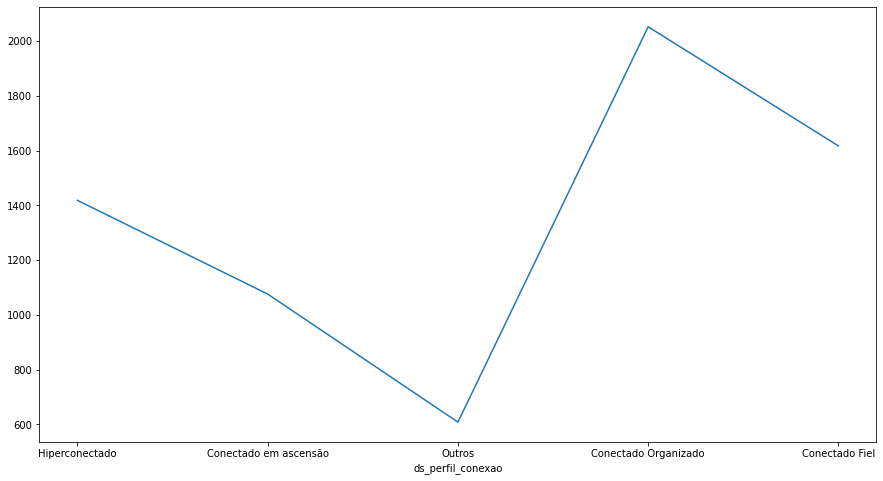

In [10]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df['avg_vl_total_spending']/  df['clientes'], palette = 'bright')
plt.show()